# Template

In [17]:
import os
import itertools
import numpy as np
import matplotlib.pyplot as plt
import scienceplots
import pandas as pd
from scipy.optimize import curve_fit
from scipy.signal import find_peaks, savgol_filter

plt.style.use('science')
plt.rcParams.update({'font.size': 14})

# Versuch 1

In [ ]:
TABLE = [
    [2.00, 4.00, 8.00,  16.00, 32.0, 64.0,  128.0],
    [2.24, 4.49, 8.98,  17.95, 36.0, 71.8,  144.0], 
    [2.52, 5.04, 10.10, 20.16, 40.3, 80.6,  161.0],
    [2.83, 5.66, 11.30, 22.62, 45.3, 90.5,  181.0],
    [3.17, 6.35, 12.70, 25.39, 50.8, 102.0, 203.0],
    [3.56, 7.13, 14.30, 28.50, 57.0, 114.0, 228.0]
]

def get_xmin_from_table(group_num: int, element_num: int) -> tuple[float, float, float]:
    if not (1 <= element_num <= 6):
        raise ValueError("element_num must be 1-6")
    if not (1 <= group_num <= 7):
        raise ValueError("group_num must be 1-7")

    arr = np.ravel(np.transpose(TABLE))   
    flat_index = (group_num - 1) * len(TABLE) + (element_num - 1)

    x_mid = 1/arr[flat_index]
    if flat_index <= 0:
        x_pre = 1/1.78
    else:
        x_pre = 1/arr[flat_index-1]
    
    if flat_index >= len(arr):
        x_post = 1/250
    else:
        x_post = 1/arr[flat_index+1]
    
    return x_mid, (x_pre, x_post)

In [42]:
d_1 = 2 #mm
d_2 = 3 #mm
d_3 = 6 #mm
dd = 0.1 #mm

f = 60 #mm
lam_blau = 470 #nm
lam_rot = 635 #nm
dlam = 5 #nm

wavelengths = [lam_blau, lam_rot]
diameters = [d_3, d_2, d_1]

data = list(itertools.product(wavelengths, diameters))

def deltx_min(lam, d, dlam=dlam, dd=dd, f=f):
    xmin = 0.61*2*f*lam / d
    dximn = xmin*(dlam/lam + dd/d)

    return xmin, dximn

In [70]:
Measurements = {
    'blau 6mm' : (7,2),
    'blau 3mm' : (6,3),
    'blau 2mm' : (5,6),
    'rot 6mm' : (6,6),
    'rot 3mm' : (5,6),
    'rot 2mm' : (5,3)
}

x_mess = []
dx_mess = []
print('Gemessene Werte')
for name, measure in Measurements.items():
    x_min, (low_x, high_x) = get_xmin_from_table(*measure)
    dx_min = max(low_x-x_min, x_min-high_x)

    print(f'{name}: x_min = {x_min*1000:.1f} pm {dx_min*1000:.2f} um')
    x_mess.append(x_min*1000)
    dx_mess.append(dx_min*1000)

x_theo = []
dx_theo = []
print('\nTheoretische Werte')
for i, (lam, d) in enumerate(data):
    x_min_theo , dx_min_theo = deltx_min(lam, d)
    print(f'{list(Measurements.keys())[i]}: x_min = {x_min_theo/1000:.2f} pm {dx_min_theo/1000:.2f} um')
    x_theo.append(x_min_theo/1000)
    dx_theo.append(dx_min_theo/1000)

Gemessene Werte
blau 6mm: x_min = 6.9 pm 0.87 um
blau 3mm: x_min = 12.4 pm 1.52 um
blau 2mm: x_min = 17.5 pm 2.14 um
rot 6mm: x_min = 8.8 pm 1.03 um
rot 3mm: x_min = 17.5 pm 2.14 um
rot 2mm: x_min = 24.8 pm 2.96 um

Theoretische Werte
blau 6mm: x_min = 5.73 pm 0.16 um
blau 3mm: x_min = 11.47 pm 0.50 um
blau 2mm: x_min = 17.20 pm 1.04 um
rot 6mm: x_min = 7.75 pm 0.19 um
rot 3mm: x_min = 15.49 pm 0.64 um
rot 2mm: x_min = 23.24 pm 1.35 um


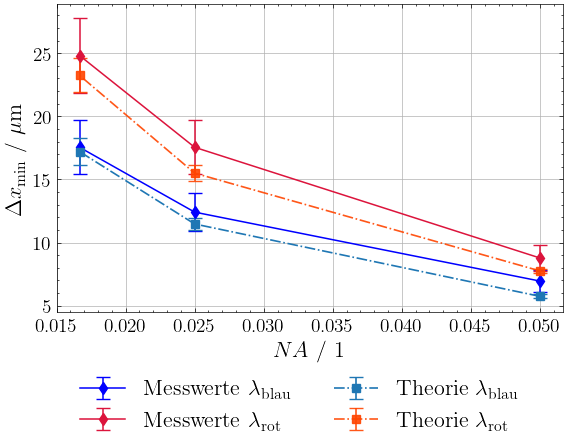

In [94]:
fig, ax = plt.subplots(figsize=(6, 4))

NA = np.array(diameters) / (2 * f)
dNA = dd / (2*f)

# Messwerte übersichtshalber ohne Unsicherheit!
ax.errorbar(NA, x_mess[:3], yerr=dx_mess[:3], color='blue', fmt="-d", label=r"Messwerte $\lambda_\text{blau}$", capsize=5,linewidth=1.1)
ax.errorbar(NA, x_mess[3:], yerr=dx_mess[3:], color='crimson', fmt="-d", label=r"Messwerte $\lambda_\text{rot}$", capsize=5, linewidth=1.1)

ax.errorbar(NA, x_theo[:3], yerr=dx_theo[:3], color='tab:blue', fmt="-.s", label=r"Theorie $\lambda_\text{blau}$", capsize=5, linewidth=1.2)
ax.errorbar(NA, x_theo[3:], yerr=dx_theo[3:], color='orangered', alpha=0.9, fmt="-.s", label=r"Theorie $\lambda_\text{rot}$", capsize=5,linewidth=1.2)


ax.set_xlabel(r"$NA$ / 1", fontsize=16)
ax.set_ylabel(r"$\Delta x_\text{min}$ / $\mu$m", fontsize=16)
ax.grid(True)
fig.legend(loc="lower center", fontsize=16, frameon=False,ncols=2, bbox_to_anchor=(0.525, -0.17))
plt.tight_layout()
plt.show()

# Versuch 3

In [ ]:
files = [
    '01_AbbeTheorie/data/V03_Abstand_groß_Objekt_Beugung_2-4.png', #(2,4)
    '01_AbbeTheorie/data/V02_Objekt_Beugung.png' #(3,4)
    '01_AbbeTheorie/data/V03_Abstand_klein_Objekt_Beugung.png', #(4,4)
]
